<h1>YouTube comments Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install textblob

In [3]:
#!pip install wordcloud

In [4]:
from textblob import TextBlob

In [5]:
videos=pd.read_csv("USvideos.csv", error_bad_lines=False)
videos.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [6]:
comments=pd.read_csv('UScomments.csv',error_bad_lines=False)
comments.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
TextBlob('Logan Paul it\'s yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [8]:
polarity=[]
for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

comments['polarity']=polarity
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [9]:
comments_positive = comments[comments['polarity']==1]
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [12]:
total_comments=(' '.join(comments_positive['comment_text']))
total_comments

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

<h2>Word Cloud of Positive Comments</h2>

(-0.5, 999.5, 499.5, -0.5)

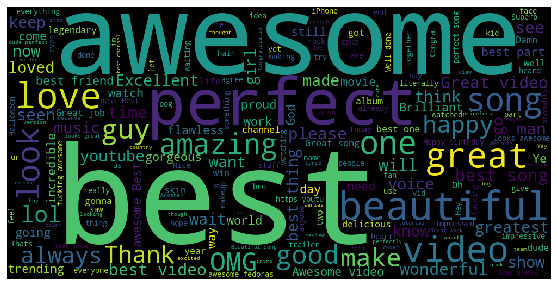

In [13]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [14]:
comments_negative=comments[comments['polarity']==-1]
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [15]:
comments_negative=(' '.join(comments_negative['comment_text']))
comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

<h2>Word Cloud of Negative Comments</h2>

(-0.5, 999.5, 499.5, -0.5)

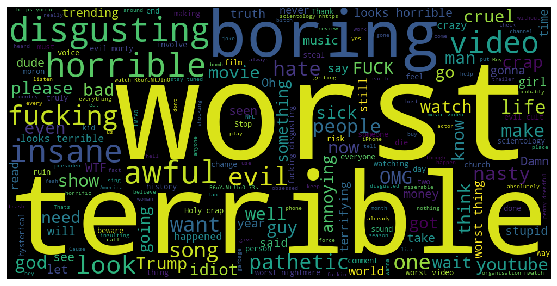

In [16]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [17]:
comments_neutral=comments[comments['polarity']==0]
comments_neutral.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [18]:
import re

In [19]:
tags_complete=(' '.join(videos['tags']))

In [20]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

<h2>Most Common Words</h2>

(-0.5, 999.5, 499.5, -0.5)

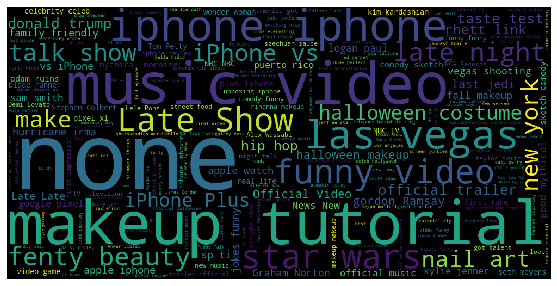

In [21]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

<h2>Relation between likes and views</h2>

Text(0.5, 1.0, 'Regression plot for likes vs views')

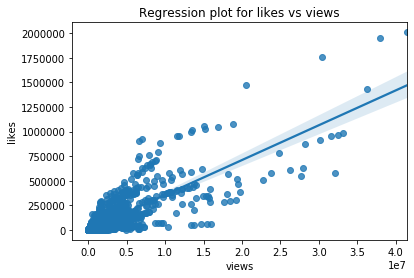

In [22]:
sns.regplot(data=videos, x='views', y='likes')
plt.title("Regression plot for likes vs views")

Text(0.5, 1.0, 'Regression plot for dislikes vs views')

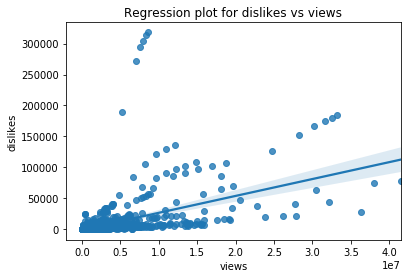

In [23]:
sns.regplot(data=videos,x='views', y='dislikes')
plt.title("Regression plot for dislikes vs views")

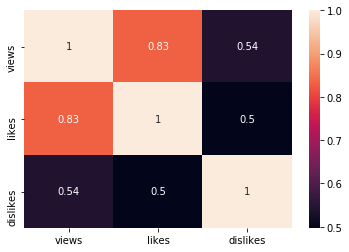

In [24]:
df_corr = videos[['views', 'likes', 'dislikes']]
sns.heatmap(df_corr.corr(),annot=True)

Text(0.5, 1.0, 'Regression between views and comments')

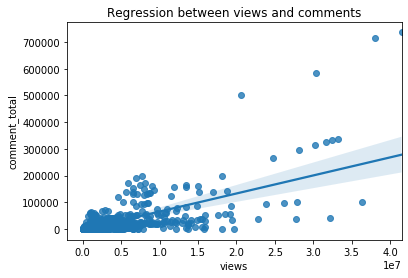

In [25]:
sns.regplot(data=videos, x='views', y='comment_total')
plt.title("Regression between views and comments")

<h2>Most used Emoji</h2>

In [26]:
!pip install emoji

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\Gaurav\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\Gaurav\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gaurav\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\Gaurav\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gaurav\anaconda3\lib\site-packages\pip\_

In [27]:
import emoji

In [28]:
comments['comment_text'].dropna(inplace=True)

In [29]:
len(comments)

691400

In [30]:
comments

video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  polarity  
0            0       0.0  
1            0       0.0  
2            0       0.0  
3            0       0.0  
4            0       0.0  
...        ...       ...  
691395       0       0.0  
691396       0       0.0  
691397       0       0.0  
691398       0       0.0  
691399       0       0.0  

[691400 rows x 5 columns]

In [31]:
comments["comment_text"][4]

'trending 😉'

In [32]:
comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😉']

In [33]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

str

'‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊

In [34]:
len(str)

304745

In [35]:
res = {i : str.count(i) for i in set(str)}
res

{'➡': 66,
 '🎪': 8,
 '♈': 8,
 '👎': 673,
 '🇵': 639,
 '🚩': 16,
 '🕦': 4,
 '⏲': 3,
 '⬅': 15,
 '⛏': 4,
 '🥈': 7,
 '💡': 19,
 '📗': 6,
 '🎟': 38,
 '🎞': 4,
 '🔄': 5,
 '💔': 617,
 '🐑': 117,
 '🍣': 23,
 '🇪': 225,
 '🥛': 14,
 '🚎': 4,
 '🐖': 29,
 '☢': 7,
 '🕛': 7,
 '🏜': 6,
 '🚛': 4,
 '⚠': 68,
 '💺': 5,
 '🚳': 6,
 '🔍': 9,
 '📝': 19,
 '🌔': 6,
 '🇹': 490,
 '🙁': 133,
 '😺': 83,
 '🌇': 8,
 '📫': 8,
 '🤦': 390,
 '💱': 7,
 '🐣': 71,
 '🕷': 35,
 '🗄': 2,
 '🥕': 9,
 '🍉': 97,
 '🌼': 108,
 '🈹': 5,
 '🏦': 5,
 '🍎': 49,
 '🍐': 36,
 '🍑': 127,
 '👥': 12,
 '🐻': 128,
 '🌃': 13,
 '😡': 478,
 '🐠': 21,
 '🌌': 70,
 '🚓': 7,
 '🏌': 7,
 '🏊': 16,
 '🐐': 224,
 '🏪': 5,
 '🔩': 15,
 '🔠': 5,
 '⭕': 22,
 '↘': 8,
 '🗨': 6,
 '🎳': 21,
 '🎴': 9,
 '🆖': 4,
 '📠': 8,
 '➿': 4,
 '🖨': 2,
 '🍥': 22,
 '🏚': 4,
 '❄': 206,
 '🍁': 223,
 '😘': 5545,
 '⚓': 16,
 '😕': 453,
 '🇳': 269,
 '👖': 31,
 '⏮': 3,
 '🏹': 7,
 '➰': 14,
 '↖': 4,
 '🍴': 16,
 '⏬': 4,
 '💝': 592,
 '🚠': 7,
 '🎛': 4,
 '⛷': 5,
 '🗳': 3,
 '🏟': 8,
 '🌺': 81,
 '㊙': 5,
 '🚕': 3,
 '🔗': 4,
 '🙉': 43,
 '🌘': 4,
 '🦇': 15,
 '🥔': 17,
 '🦃': 13,


In [36]:
res={k:v for k,v in sorted(res.items(), key=lambda item: item[1])}
res

{'♾': 1,
 '🤪': 1,
 '🧢': 1,
 '🤭': 1,
 '🤟': 1,
 '🤬': 1,
 '🗄': 2,
 '🖨': 2,
 '🖲': 2,
 '🔟': 2,
 '⏹': 2,
 '🛢': 2,
 '⏺': 2,
 '⚒': 2,
 '🎏': 2,
 '🏷': 2,
 '⏭': 2,
 '⚙': 2,
 '☣': 2,
 '⏯': 2,
 '⏸': 2,
 '☦': 2,
 '⚗': 2,
 '🤨': 2,
 '⏲': 3,
 '⏮': 3,
 '🗳': 3,
 '🚕': 3,
 '🗂': 3,
 '🛩': 3,
 '🎎': 3,
 '🗒': 3,
 '🏮': 3,
 '◼': 3,
 '📴': 3,
 '🗓': 3,
 '🏑': 3,
 '☂': 3,
 '🖇': 3,
 '🛣': 3,
 '➗': 3,
 '🕹': 3,
 '🗜': 3,
 '🕳': 3,
 '🤺': 3,
 '◻': 3,
 '🔳': 3,
 '🗞': 3,
 '◽': 3,
 '⚛': 3,
 '🚏': 3,
 '🧐': 3,
 '⛰': 3,
 '🛶': 3,
 '💹': 3,
 '🔖': 3,
 '🗃': 3,
 '🏎': 3,
 '🕉': 3,
 '☸': 3,
 '🖌': 3,
 '🕦': 4,
 '⛏': 4,
 '🎞': 4,
 '🚎': 4,
 '🚛': 4,
 '🆖': 4,
 '➿': 4,
 '🏚': 4,
 '↖': 4,
 '⏬': 4,
 '🎛': 4,
 '🔗': 4,
 '🌘': 4,
 '🏤': 4,
 '🕗': 4,
 '🏔': 4,
 '🌥': 4,
 '🔃': 4,
 '🕙': 4,
 '🎐': 4,
 '🕒': 4,
 '🈸': 4,
 '🛤': 4,
 '🕟': 4,
 '🈷': 4,
 '🔚': 4,
 '🛃': 4,
 '↕': 4,
 '⌨': 4,
 '🚟': 4,
 '🚜': 4,
 '☪': 4,
 '◾': 4,
 '🎽': 4,
 '🏖': 4,
 '⏱': 4,
 '🆔': 4,
 '🛂': 4,
 '🎚': 4,
 '✡': 4,
 '🚐': 4,
 '⏪': 4,
 '🦏': 4,
 '🛵': 4,
 '🚧': 4,
 '🏧': 4,
 '🕜': 4,
 '🚚': 4,
 '🕔': 4,
 '🈂': 4,
 

In [37]:
keys=[*res.keys()]
values=[*res.values()]

In [38]:
df=pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df

chars    num
0      🤣   2279
1      🏼   2549
2      😢   2672
3      💙   2831
4      👌   3112
5      😬   3381
6      💜   3429
7      🏻   3438
8      😊   3596
9      ♥   4909
10     💕   5147
11     💖   5359
12     👍   5476
13     😘   5545
14     👏   5719
15     😭   8398
16     🔥   8694
17     ❤  31119
18     😍  33453
19     😂  36987

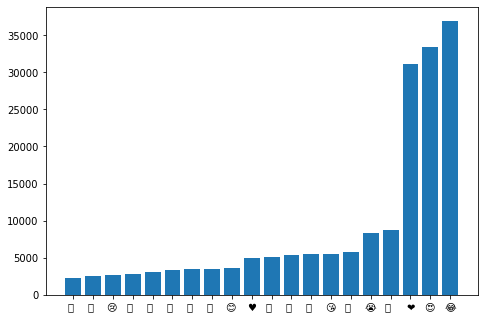

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=df['chars']
y=df['num']
ax.bar(x,y)
plt.show()